In [199]:
#basic libraries
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#jupyter notebook widget
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

#for interactive shell
from IPython.display import display

#surpress warnings
import warnings
warnings.filterwarnings('ignore')

#chart size and background
plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('fivethirtyeight')

In [200]:
#read dataset
data = pd.read_csv('movie_metadata.csv')

In [201]:
#check the shape
print(data.shape)

(5043, 28)


In [202]:
#check column wise info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [203]:
#remove unnecassary columns from dataset
data = data.drop([
    'color',
    'director_facebook_likes',
    'actor_3_facebook_likes',
    'actor_1_facebook_likes',
    'cast_total_facebook_likes',
    'actor_2_facebook_likes',
    'facenumber_in_poster',
    'content_rating',
    'country',
    'movie_imdb_link',
    'aspect_ratio',
    'plot_keywords',
], axis = 1)
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [204]:
#check the rows having percentage of missing values 
round(100*(data.isnull().sum()/len(data.index)),2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [205]:
#drop high percentage missing value rows
data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

In [206]:
#check missing values columns wise
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [207]:
#delete rows that contain more than 2 missing values
data = data[data.isnull().sum(axis=1) <= 2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [208]:
#impute missing values

#using mean for numerical columns
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace=True)
data['duration'].fillna(data['duration'].mean(), inplace=True)

#using mode for categorical columns
data['language'].fillna(data['language'].mode()[0], inplace=True)

#actor names with "unknown actor" values
data['actor_2_name'].fillna('unknown actor', inplace=True)
data['actor_3_name'].fillna('unknown actor', inplace=True)

#no. of total missing values
data.isnull().sum().sum()

0

In [209]:
#convert gross and budget from $ to million $
data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [210]:
#create profit column
data['profit'] = data['gross'] - data['budget']

In [211]:
#name of the top 10 movies
data[['profit','movie_title']].sort_values(by='profit', ascending=False).head(10)

,profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [212]:
#print no of rows before remove duplicates
print('no of rows before remove duplicates: ', data.shape[0])

#remove duplicates
data.drop_duplicates(subset = None, keep = 'first', inplace=True)

#print no of rows after remove duplicates
print('no of rows after remove duplicates: ', data.shape[0])

no of rows before remove duplicates:  3888
no of rows after remove duplicates:  3853


In [213]:
#chack language column values
data['language'].value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Hebrew           3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

In [214]:
#catergorized into 2 grop as english and foreign
def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'
    
    
#apply the function to the language column
data['language'] = data['language'].apply(language)

#check the values again
data['language'].value_counts()

English    3673
Foreign     180
Name: language, dtype: int64

In [215]:
data['duration'].value_counts()

101.0    113
100.0    109
98.0     105
95.0      97
99.0      97
        ... 
196.0      1
63.0       1
185.0      1
219.0      1
65.0       1
Name: duration, Length: 157, dtype: int64

In [216]:
#catergorized into 2 grop as short and long according to duration
def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
    
    
#apply the function to the duration column
data['duration'] = data['duration'].apply(duration)

#check the values again
data['duration'].value_counts()

Short    2936
Long      917
Name: duration, dtype: int64

In [217]:
#check values in genres column
data['genres'].value_counts()

Drama                                     153
Comedy|Drama|Romance                      151
Comedy|Drama                              147
Comedy                                    145
Comedy|Romance                            135
                                         ... 
Action|Crime|Drama|Thriller|War             1
Adventure|Comedy|Family|Musical             1
Action|Adventure|Family|Fantasy|Sci-Fi      1
Action|Drama|Mystery|Thriller|War           1
Comedy|Crime|Horror                         1
Name: genres, Length: 762, dtype: int64

In [218]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [219]:
#lets keep only 4 genres
data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

#if movie have 1 genere assign the same genere to other generes
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

#check head of dataset
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice                  1.599794
1    150                        Ghostbusters                  1.076336
2   1582                        Ghostbusters                  1.075827
3     96                        Interstellar                  1.024561
4   3015               10 Days in a Madhouse                  0.828025
5    945                      Into the Woods                  0.692937
6     73                       Suicide Squad                  0.652817
7   1190                Fifty Shades of Grey                  0.624307
8    108                            Warcraft                  0.622790
9     92        Independence Day: Resurgence                  0.599274


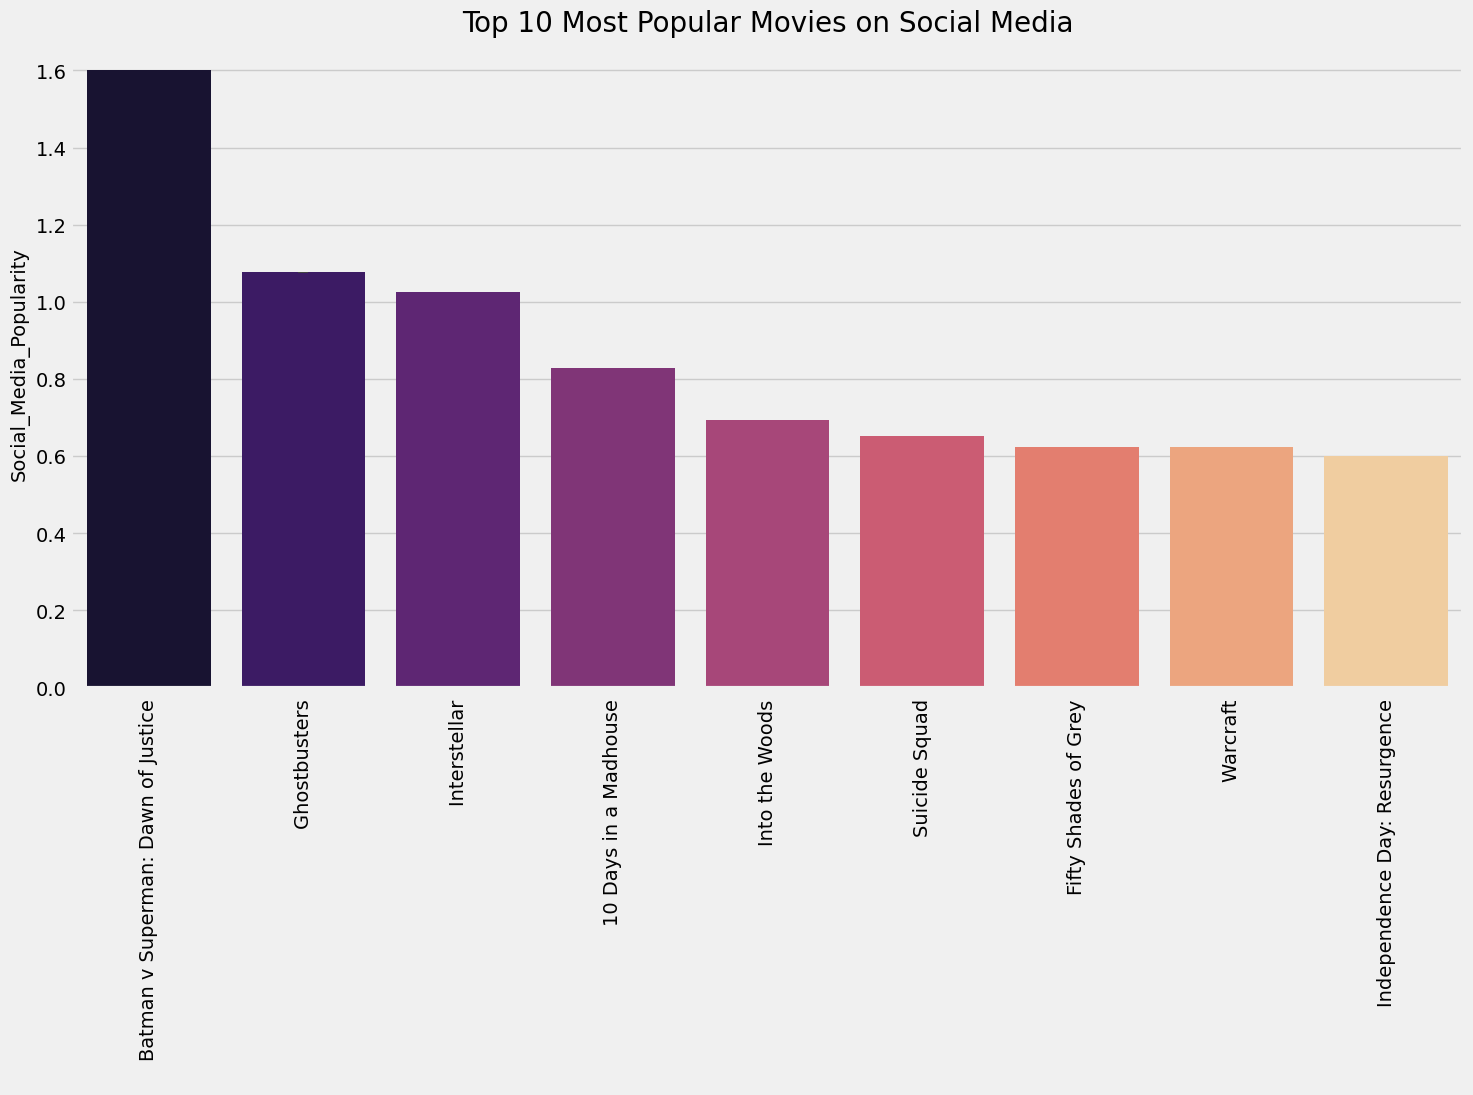

In [220]:
#calculate movie social media popularity

#aggregate no of voted users, no of users for reviews, facebook likes
data['Social_Media_Popularity'] = ((data['num_user_for_reviews']/data['num_voted_users'])*(data['movie_facebook_likes']))/1000

#check top 10 mmost popular movies on social media
x = data[['movie_title','Social_Media_Popularity']].sort_values(by='Social_Media_Popularity', ascending=False).head(10).reset_index()

print(x)

sns.barplot(x=x['movie_title'], y=x['Social_Media_Popularity'], palette='magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize=20)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel(' ')
plt.show()

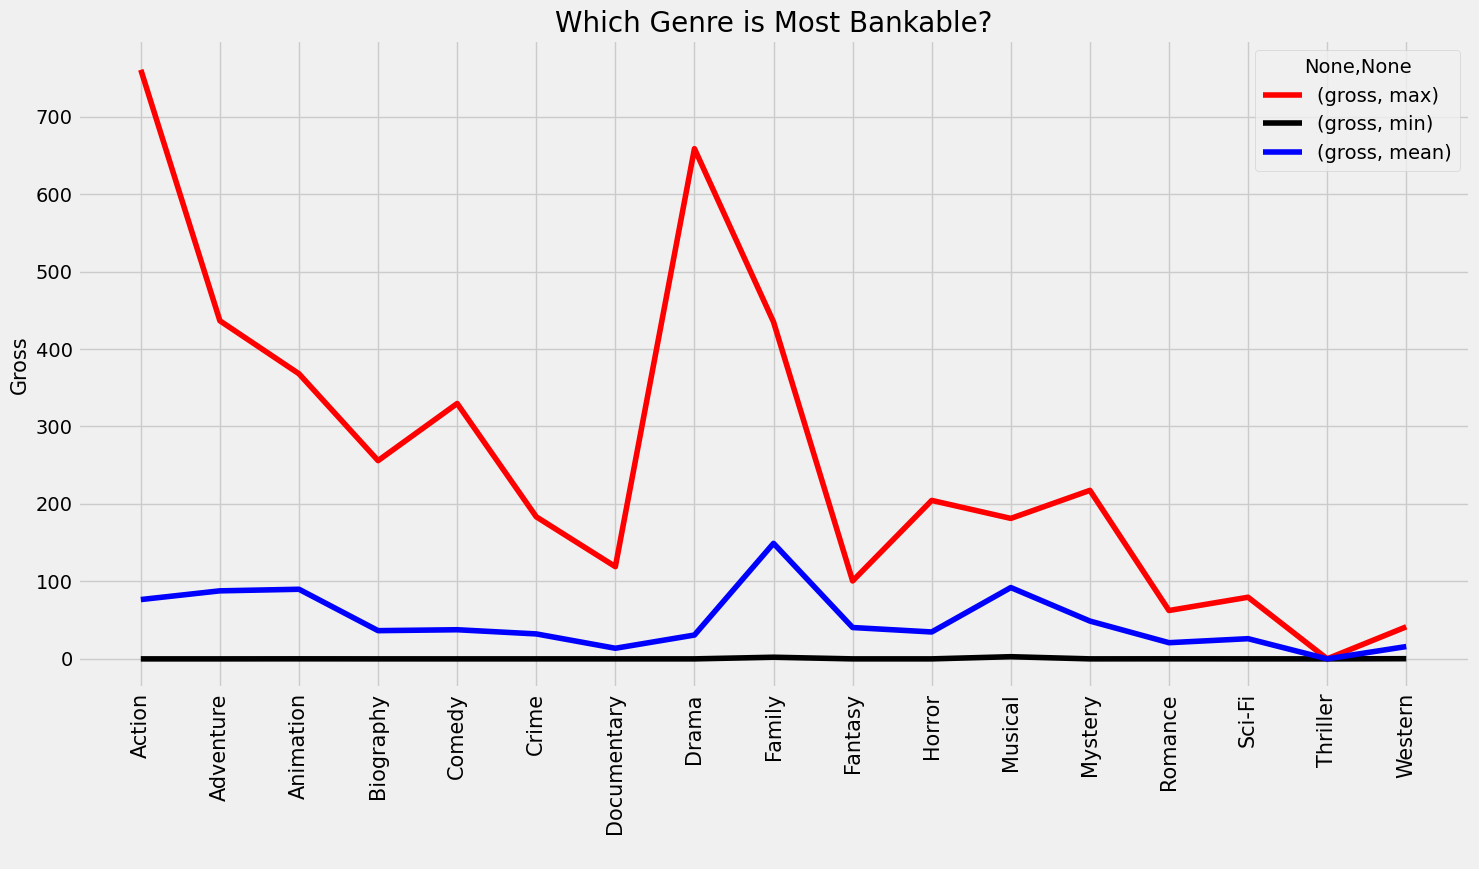

In [221]:
#compare gross with genre

#group the genre and get max,min,avg of gross of the movies
display(data[['Genre1','gross']].groupby(['Genre1']).agg(['max','min','mean']).style.background_gradient(cmap='Wistia'))

#plot these values using line plot
data[['Genre1','gross']].groupby(['Genre1']).agg(['max','min','mean']).plot(kind='line', color=['red','black','blue'])
plt.title('Which Genre is Most Bankable?', fontsize=20)
plt.xticks(np.arange(17),['Action','Adventure','Animation','Biography','Comedy','Crime','Documentary','Drama','Family','Fantasy','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller', 'Western'], rotation=90, fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.xlabel(' ',)
plt.show()

In [222]:
print('The most profitable movie from each genre')
display(data.loc[data.groupby(data['Genre1'])['profit'].idxmax()][['Genre1','movie_title','gross']].style.background_gradient(cmap='copper'))

The most profitable movie from each genre


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [223]:
#convert year into integer
data['title_year'] = data['title_year'].astype('int')

In [224]:
print('most profitable years in box office')
display(data[['title_year','language','profit']].groupby(['language','title_year']).agg('sum').sort_values(by='profit', ascending = False).head(10).style.background_gradient(cmap='Greens'))

most profitable years in box office


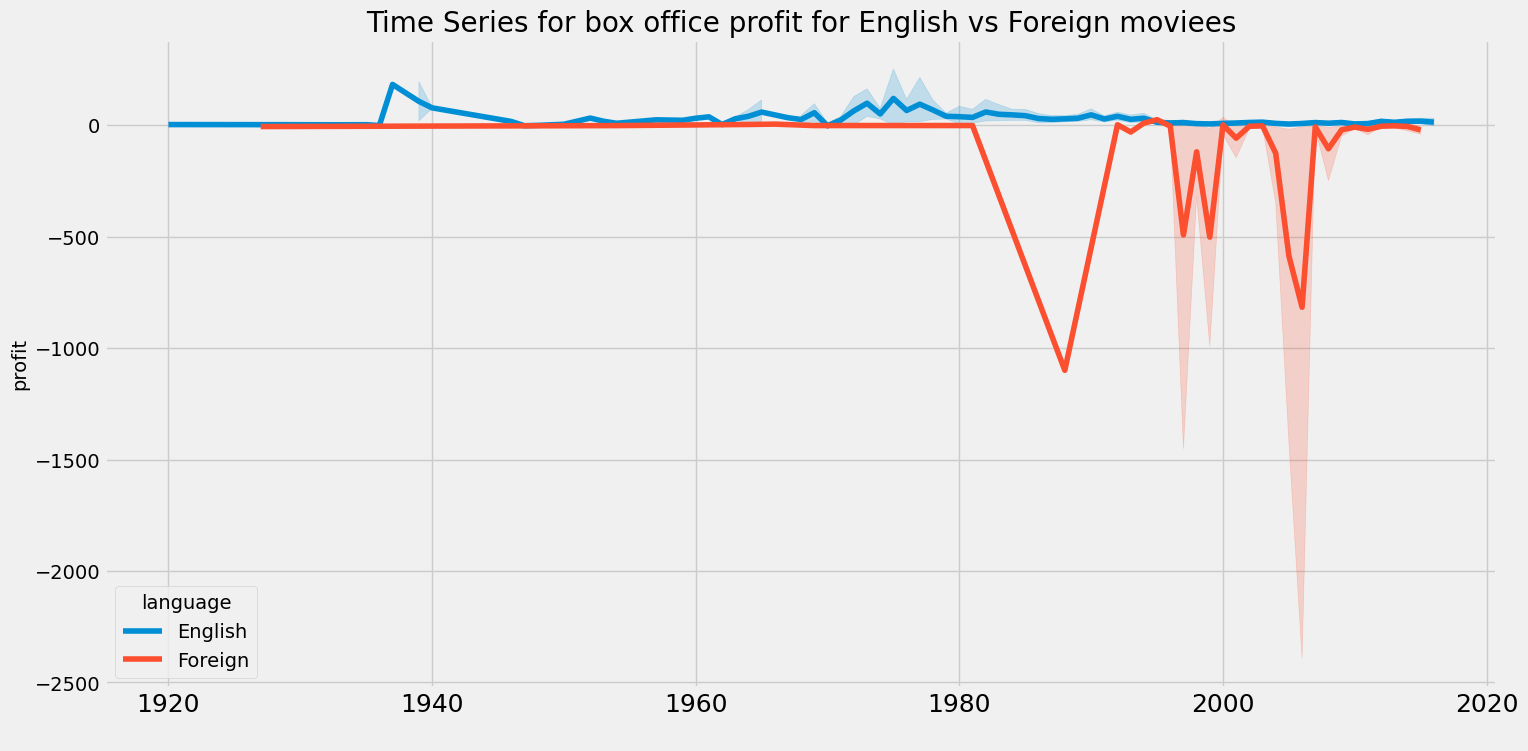

In [225]:
#plot them
sns.lineplot(x = data['title_year'], y = data['profit'], hue=data['language'])
plt.title('Time Series for box office profit for English vs Foreign moviees', fontsize=20)
plt.xticks(fontsize=18)
plt.xlabel(' ')
plt.show()

In [226]:
print('movies that made huge losses')
display(data[data['profit'] < -2000][['movie_title','language','profit']].style.background_gradient(cmap='Reds'))

movies that made huge losses


,movie_title,language,profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


In [227]:
display(data[data['duration'] == 'Long'][['movie_title','duration','gross','profit']].sort_values(by = 'profit', ascending = False).head(5).style.background_gradient(cmap='spring'))

display(data[data['duration'] == 'Short'][['movie_title','duration','gross','profit']].sort_values(by = 'profit', ascending = False).head(5).style.background_gradient(cmap='spring'))

,movie_title,duration,gross,profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
17,The Avengers,Long,623.279547,403.279547


,movie_title,duration,gross,profit
3080,E.T. the Extra-Terrestrial,Short,434.949459,424.449459
509,The Lion King,Short,422.783777,377.783777
812,Deadpool,Short,363.024263,305.024263
521,Despicable Me 2,Short,368.049635,292.049635
338,Finding Nemo,Short,380.838870,286.838870


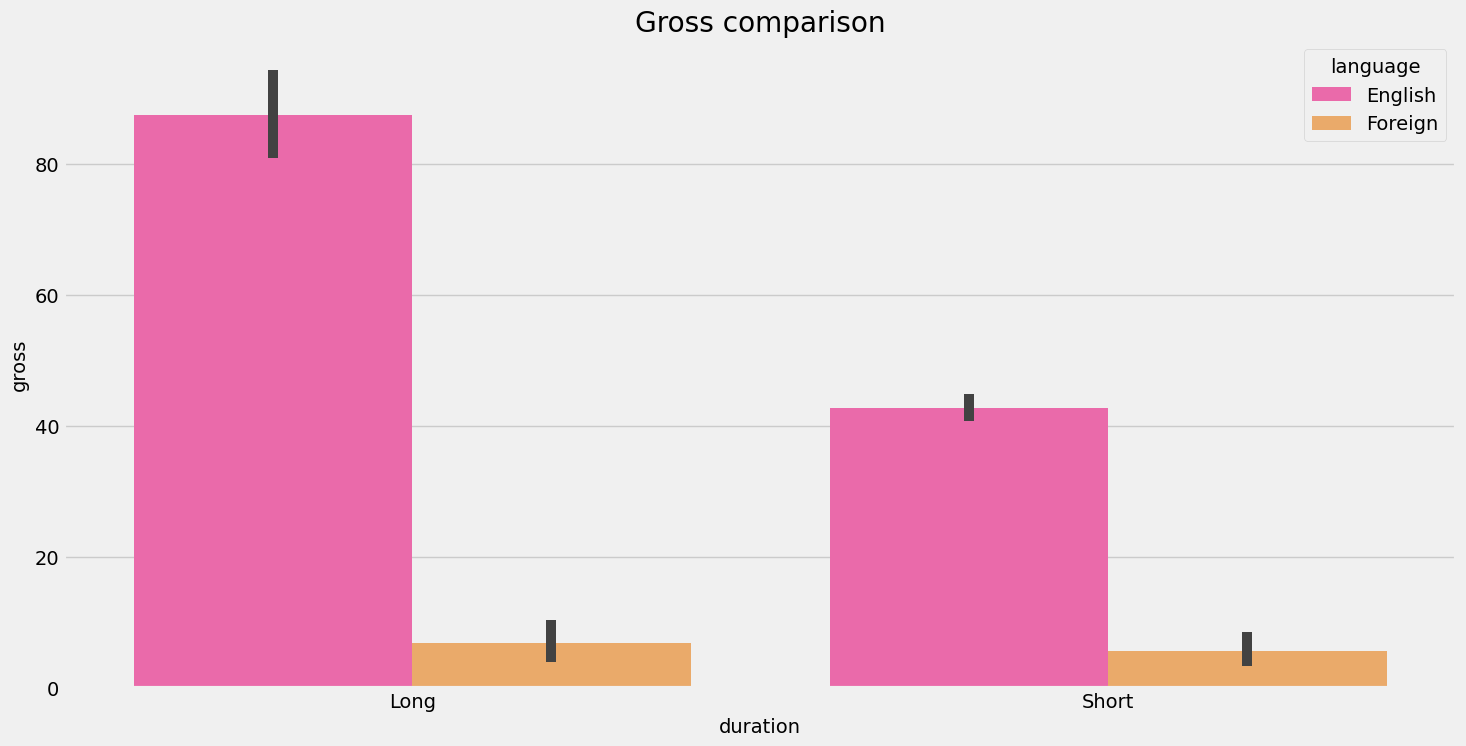

In [228]:
sns.barplot(x = data['duration'], y = data['gross'], hue = data['language'], palette='spring')
plt.title('Gross comparison')
plt.show()

In [229]:
print('average IMDB score for long duration movies is {0:.2f} '.format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print('average IMDB score for short duration movies is {0:.2f} '.format(data[data['duration'] == 'Short']['imdb_score'].mean()))

average IMDB score for long duration movies is 7.06 
average IMDB score for short duration movies is 6.28 


In [230]:
print('\nhighest long duration movies\n', data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))
print('\nhighest short duration movies\n', data[data['duration'] == 'Short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))


highest long duration movies
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

highest short duration movies
               movie_title  imdb_score
3592  The Usual Suspects          8.6


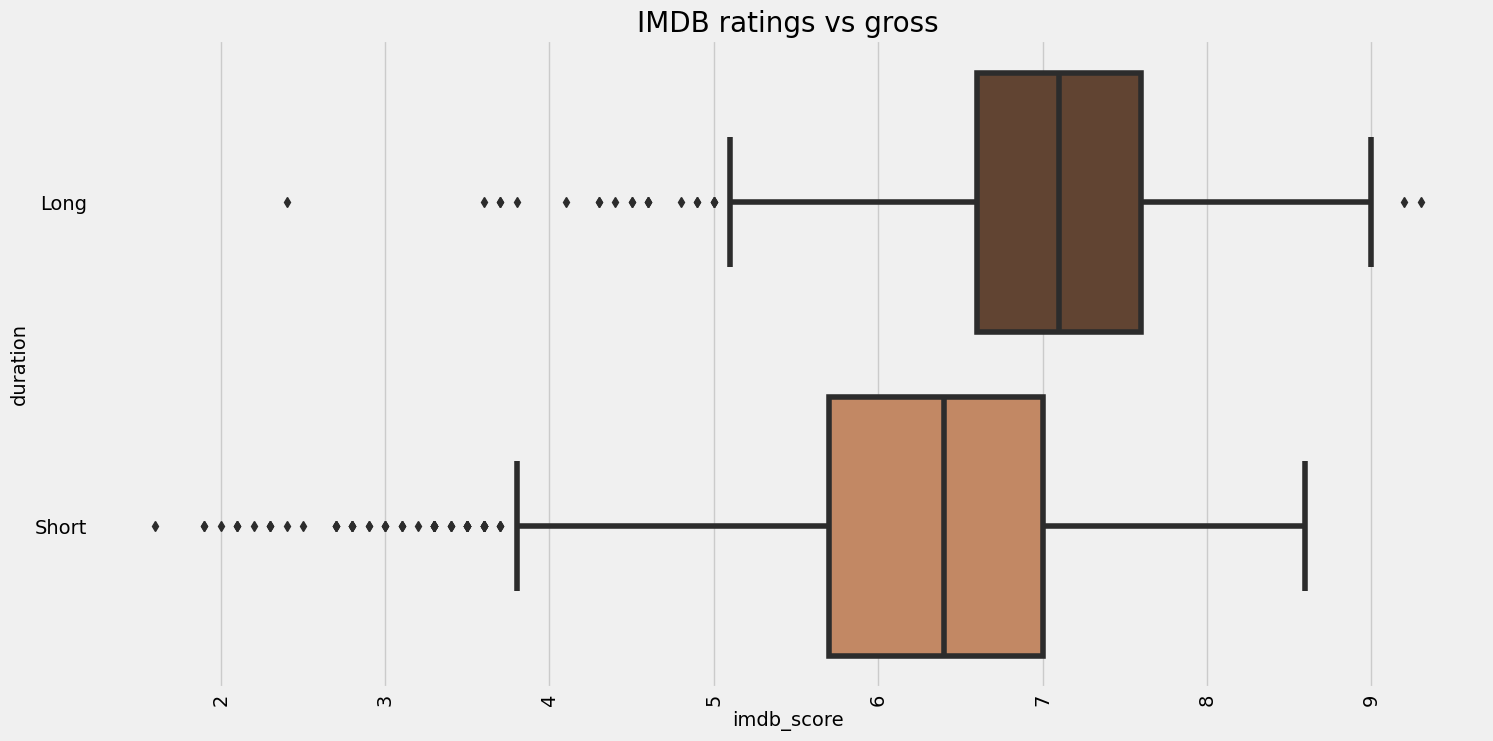

In [231]:
sns.boxplot(x = data['imdb_score'], y = data['duration'], palette='copper')
plt.title('IMDB ratings vs gross', fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [232]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)

    y = y[['movie_title','budget','gross','title_year','genres','language','imdb_score']]

    return y

In [233]:
query_actors('Meryl Streep')

,movie_title,budget,gross,title_year,genres,language,imdb_score
410,It's Complicated,85.0,112.703470,2009,Comedy|Drama|Romance,English,6.6
1106,The River Wild,45.0,46.815748,1994,Action|Adventure|Crime|Thriller,English,6.3
1204,Julie & Julia,40.0,94.125426,2009,Biography|Drama|Romance,English,7.0
1408,The Devil Wears Prada,35.0,124.732962,2006,Comedy|Drama|Romance,English,6.8
1483,Lions for Lambs,35.0,14.998070,2007,Drama|Thriller|War,English,6.2
1575,Out of Africa,31.0,87.100000,1985,Biography|Drama|Romance,English,7.2
1618,Hope Springs,30.0,63.536011,2012,Comedy|Drama|Romance,English,6.3
1674,One True Thing,30.0,23.209440,1998,Drama,English,7.0
1925,The Hours,25.0,41.597830,2002,Drama|Romance,English,7.6
2781,The Iron Lady,13.0,29.959436,2011,Biography|Drama|History,English,6.4


In [234]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    print('Time:', y['title_year'].min(), y['title_year'].max())
    print('Max Gross : {0:.2f}Millions'. format(y['gross'].max()))
    print('Avg Gross : {0:.2f}Millions'. format(y['gross'].mean()))
    print('Min Gross : {0:.2f}Millions'. format(y['gross'].min()))
    print('No of 100 Million Movies :', y[y['gross'] > 100].shape[0])
    print('Avg IMDB Score : {0:.2f}'.format(y['imdb_score'].mean()))
    print('Most Common Genere :\n', y['Genre1'].value_counts().head())

actors_report('Meryl Streep')

Time: 1985 2014
Max Gross : 143.70Millions
Avg Gross : 55.23Millions
Min Gross : 9.66Millions
No of 100 Million Movies : 4
Avg IMDB Score : 6.81
Most Common Genere :
 Drama        9
Comedy       7
Biography    3
Adventure    3
Action       1
Name: Genre1, dtype: int64


In [235]:
#compare  Bradd Pitt and Leonardo DiCaprio, Tom Cruise

def critically_acclaimed_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')

print('Total no of critic reviews for Brad Pitt')
display(critically_acclaimed_actors('Brad Pitt'))

print('Total no of critic reviews for Leonardo DiCaprio')
display(critically_acclaimed_actors('Leonardo DiCaprio'))

print('Total no of critic reviews for Tom Cruise')
display(critically_acclaimed_actors('Tom Cruise'))

Total no of critic reviews for Brad Pitt


7814

Total no of critic reviews for Leonardo DiCaprio


7014

Total no of critic reviews for Tom Cruise


6740

In [236]:
@interact
def show_movies_more_than(column='imdb_score', score=9.0):
    x = data.loc[data[column] > score][['title_year','movie_title','director_name','actor_1_name','actor_2_name','actor_3_name','imdb_score','profit']]
    x = x.sort_values(by='imdb_score', ascending=False)
    x = x.drop_duplicates(keep='first')
    return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [237]:
@interact
def show_articles_more_than(column=['budget','gross'], x=1000):
    return data.loc[data[column] > x][['movie_title','duration','gross','imdb_score','profit']]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

# recommending movies based on language

In [238]:
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language'] == x]
    y = y.sort_values(by='imdb_score', ascending=False)
    return y.head(15)

In [239]:
recommend_lang('Foreign')

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
4921,Foreign,Children of Heaven,8.5
4259,Foreign,The Lives of Others,8.5
3931,Foreign,Samsara,8.5
4659,Foreign,A Separation,8.4
1329,Foreign,Baahubali: The Beginning,8.4
2970,Foreign,Das Boot,8.4


# recommending movies based on actors

In [240]:
def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by='imdb_score', ascending=False)
    return a.head(15)

In [241]:
recommend_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
284,Minority Report,7.7
158,The Last Samurai,7.7
736,Collateral,7.6
1524,A Few Good Men,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
671,Eyes Wide Shut,7.3


# recommend movies on similar genres

In [242]:
from mlxtend.preprocessing import TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns=te.columns_)

#check head of x
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [243]:
#convert this into boolean
genres = x.astype('int')
genres.head() 

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [244]:
#insert movie title to first column
genres.insert(0, 'movie_title', data['movie_title'])
genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [245]:
#set movie title as index
genres = genres.set_index('movie_title')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [246]:
#recommend similar genres
def recommend_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)

In [247]:
recommend_genres('Action')

Adventure    0.320532
Thriller     0.303708
Sci-Fi       0.295018
dtype: float64

# recommend similar movies

In [248]:
x = genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,Four Weddings and a Funeral,NaN,NaN,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [249]:
#recommend similar movies
def recommend_movies(movie):
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

In [251]:
recommend_movies('Avatar')

movie_title
Center Stage                                1.000000
Romeo Must Die                              1.000000
Must Love Dogs                              1.000000
The Big Lebowski                            1.000000
Daylight                                    1.000000
Charlie's Angels: Full Throttle             1.000000
Prometheus                                  1.000000
Oz the Great and Powerful                   1.000000
Kung Pow: Enter the Fist                    1.000000
The Chronicles of Riddick                   1.000000
The Lone Ranger                             1.000000
NaN                                         0.870572
Alice in Wonderland                         0.870572
Ratatouille                                 0.870572
Night at the Museum: Secret of the Tomb     0.870572
BloodRayne                                  0.870572
Big Mommas: Like Father, Like Son           0.870572
Dear John                                   0.870572
Scary Movie 3                     